In [1]:
import sys
sys.executable

'/opt/anaconda3/envs/tf/bin/python'

In [2]:
import sys
!{sys.executable} -m pip install openpyxl

In [3]:
#Importing necessary library

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import os
print(os.getcwd())


/Users/manishamishra/Documents/DSProjects/src


In [7]:
# Reading the data

In [8]:
df = pd.read_excel("../resources/World_development_mesurement.xlsx")

In [9]:
df.head()

Birth Rate Business Tax Rate  CO2 Emissions       Country  \
0       0.020               NaN        87931.0       Algeria   
1       0.050               NaN         9542.0        Angola   
2       0.043               NaN         1617.0         Benin   
3       0.027               NaN         4276.0      Botswana   
4       0.046               NaN         1041.0  Burkina Faso   

   Days to Start Business  Ease of Business  Energy Usage              GDP  \
0                     NaN               NaN       26998.0  $54,790,058,957   
1                     NaN               NaN        7499.0   $9,129,594,819   
2                     NaN               NaN        1983.0   $2,359,122,303   
3                     NaN               NaN        1836.0   $5,788,311,645   
4                     NaN               NaN           NaN   $2,610,959,139   

   Health Exp % GDP Health Exp/Capita  ...  Life Expectancy Male  \
0             0.035               $60  ...                  67.0   
1             0.034               $22  ...                  44.0   
2             0.043               $15  ...                  53.0   
3             0.047              $152  ...                  49.0   
4             0.051               $12  ...                  49.0   

   Mobile Phone Usage  Number of Records  Population 0-14  Population 15-64  \
0                 0.0                  1            0.342             0.619   
1                 0.0                  1            0.476             0.499   
2                 0.0                  1            0.454             0.517   
3                 0.1                  1            0.383             0.587   
4                 0.0                  1            0.468             0.505   

   Population 65+  Population Total  Population Urban  Tourism Inbound  \
0           0.039          31719449             0.599     $102,000,000   
1           0.025          13924930             0.324      $34,000,000   
2           0.029           6949366             0.383      $77,000,000   
3           0.029           1755375             0.532     $227,000,000   
4           0.028          11607944             0.178      $23,000,000   

   Tourism Outbound  
0      $193,000,000  
1      $146,000,000  
2       $50,000,000  
3      $209,000,000  
4       $30,000,000  

[5 rows x 25 columns]

In [10]:
df.tail()

Birth Rate Business Tax Rate  CO2 Emissions                   Country  \
2699         NaN               NaN            NaN  Turks and Caicos Islands   
2700       0.013             46.4%            NaN             United States   
2701       0.015             41.9%            NaN                   Uruguay   
2702       0.020             61.9%            NaN             Venezuela, RB   
2703       0.011               NaN            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Ease of Business  Energy Usage  \
2699                     NaN               NaN           NaN   
2700                     5.0               4.0     2132446.0   
2701                     7.0              85.0           NaN   
2702                   144.0             180.0           NaN   
2703                     NaN               NaN           NaN   

                      GDP  Health Exp % GDP Health Exp/Capita  ...  \
2699                  NaN               NaN               NaN  ...   
2700  $16,244,600,000,000             0.179            $8,895  ...   
2701      $50,004,354,667             0.089            $1,308  ...   
2702     $381,286,223,859             0.046              $593  ...   
2703                  NaN               NaN               NaN  ...   

      Life Expectancy Male  Mobile Phone Usage  Number of Records  \
2699                   NaN                 NaN                  1   
2700                  76.0                 1.0                  1   
2701                  74.0                 1.5                  1   
2702                  72.0                 1.0                  1   
2703                  76.0                 NaN                  1   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
2699              NaN               NaN             NaN             32427   
2700            0.196             0.667           0.136         313873685   
2701            0.220             0.639           0.140           3395253   
2702            0.288             0.652           0.060          29954782   
2703            0.206             0.641           0.152            105275   

      Population Urban   Tourism Inbound  Tourism Outbound  
2699             0.911               NaN               NaN  
2700             0.811  $200,092,000,000  $126,573,000,000  
2701             0.948    $2,222,000,000    $1,028,000,000  
2702             0.889      $904,000,000    $3,202,000,000  
2703             0.949               NaN               NaN  

[5 rows x 25 columns]

In [11]:
df.shape

(2704, 25)

In [12]:
df.info()                                                  #Data Types and Missing Values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [13]:
df.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [14]:
df.index


RangeIndex(start=0, stop=2704, step=1)

In [15]:
df.describe()

Birth Rate  CO2 Emissions  Days to Start Business  Ease of Business  \
count  2585.000000   2.125000e+03             1718.000000        185.000000   
mean      0.022715   1.423071e+05               39.999418         94.875676   
std       0.011338   6.159288e+05               57.318588         54.791906   
min       0.007000   7.000000e+00                1.000000          1.000000   
25%       0.013000   1.360000e+03               13.000000         48.000000   
50%       0.020000   8.529000e+03               26.000000         94.000000   
75%       0.031000   5.910800e+04               45.000000        142.000000   
max       0.053000   8.286892e+06              694.000000        189.000000   

       Energy Usage  Health Exp % GDP  Hours to do Tax  Infant Mortality Rate  \
count  1.785000e+03       2395.000000      1416.000000            2444.000000   
mean   7.723684e+04          0.064170       302.068503               0.032813   
std    2.599239e+05          0.026325       273.299686               0.029968   
min    8.000000e+00          0.008000        12.000000               0.002000   
25%    3.737000e+03          0.046000       156.000000               0.009000   
50%    1.433800e+04          0.061000       239.000000               0.020000   
75%    4.185200e+04          0.079000       344.750000               0.053000   
max    2.727728e+06          0.225000      2600.000000               0.141000   

       Internet Usage  Lending Interest  Life Expectancy Female  \
count     2531.000000       1880.000000             2568.000000   
mean         0.239747          0.148103               71.159268   
std          0.260132          0.171829               10.708262   
min          0.000000          0.005000               39.000000   
25%          0.000000          0.080000               64.000000   
50%          0.100000          0.120000               75.000000   
75%          0.400000          0.173000               79.000000   
max          1.000000          4.965000               87.000000   

       Life Expectancy Male  Mobile Phone Usage  Number of Records  \
count           2568.000000         2537.000000             2704.0   
mean              66.461838            0.578124                1.0   
std                9.390217            0.474647                0.0   
min               37.000000            0.000000                1.0   
25%               61.000000            0.100000                1.0   
50%               69.000000            0.500000                1.0   
75%               73.250000            0.900000                1.0   
max               88.000000            2.900000                1.0   

       Population 0-14  Population 15-64  Population 65+  Population Total  \
count      2484.000000       2484.000000     2484.000000      2.704000e+03   
mean          0.303051          0.623481        0.073465      3.145729e+07   
std           0.106577          0.069660        0.049541      1.242894e+08   
min           0.118000          0.474000        0.003000      1.887600e+04   
25%           0.204750          0.559000        0.033000      8.783360e+05   
50%           0.299500          0.642500        0.052000      5.800324e+06   
75%           0.402000          0.676000        0.112000      2.014089e+07   
max           0.500000          0.858000        0.244000      1.350695e+09   

       Population Urban  
count       2678.000000  
mean           0.562953  
std            0.245897  
min            0.082000  
25%            0.356000  
50%            0.560000  
75%            0.765000  
max            1.000000

In [16]:
df.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

In [17]:
# Visualize the data

In [18]:
df.isnull()

Birth Rate  Business Tax Rate  CO2 Emissions  Country  \
0          False               True          False    False   
1          False               True          False    False   
2          False               True          False    False   
3          False               True          False    False   
4          False               True          False    False   
...          ...                ...            ...      ...   
2699        True               True           True    False   
2700       False              False           True    False   
2701       False              False           True    False   
2702       False              False           True    False   
2703       False               True           True    False   

      Days to Start Business  Ease of Business  Energy Usage    GDP  \
0                       True              True         False  False   
1                       True              True         False  False   
2                       True              True         False  False   
3                       True              True         False  False   
4                       True              True          True  False   
...                      ...               ...           ...    ...   
2699                    True              True          True   True   
2700                   False             False         False  False   
2701                   False             False          True  False   
2702                   False             False          True  False   
2703                    True              True          True   True   

      Health Exp % GDP  Health Exp/Capita  ...  Life Expectancy Male  \
0                False              False  ...                 False   
1                False              False  ...                 False   
2                False              False  ...                 False   
3                False              False  ...                 False   
4                False              False  ...                 False   
...                ...                ...  ...                   ...   
2699              True               True  ...                  True   
2700             False              False  ...                 False   
2701             False              False  ...                 False   
2702             False              False  ...                 False   
2703              True               True  ...                 False   

      Mobile Phone Usage  Number of Records  Population 0-14  \
0                  False              False            False   
1                  False              False            False   
2                  False              False            False   
3                  False              False            False   
4                  False              False            False   
...                  ...                ...              ...   
2699                True              False             True   
2700               False              False            False   
2701               False              False            False   
2702               False              False            False   
2703                True              False            False   

      Population 15-64  Population 65+  Population Total  Population Urban  \
0                False           False             False             False   
1                False           False             False             False   
2                False           False             False             False   
3                False           False             False             False   
4                False           False             False             False   
...                ...             ...               ...               ...   
2699              True            True             False             False   
2700             False           False             False             False   
2701             False           False             False    

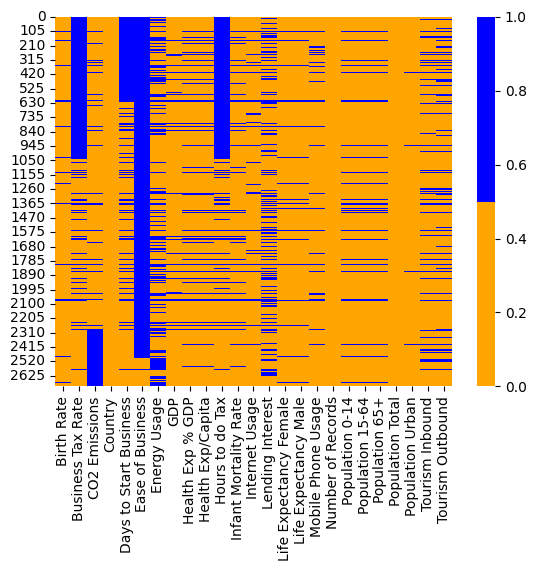

In [19]:
sns.heatmap(df.isnull(),cmap=['Orange','Blue'])
plt.show()

In [20]:
# Checking for extreme values

In [21]:
numeric_cols=df.select_dtypes(include=np.number).columns   #selecting numeric columns

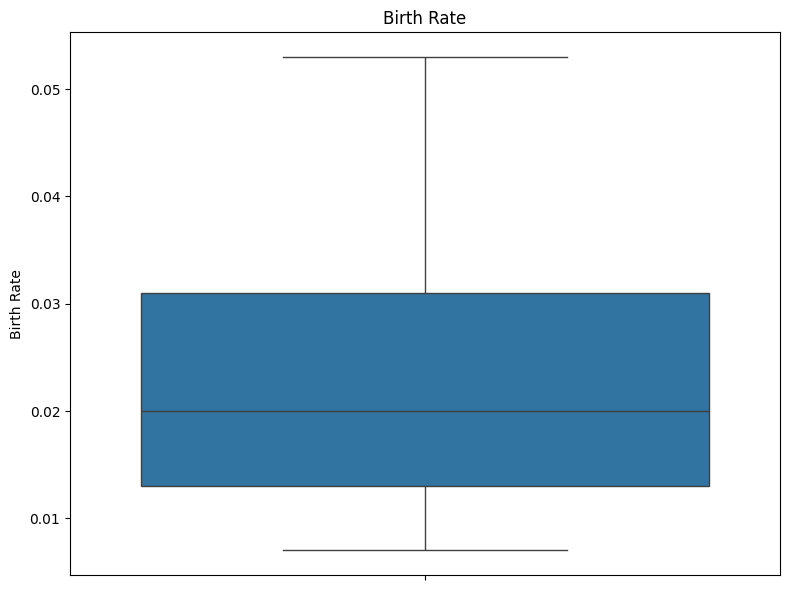

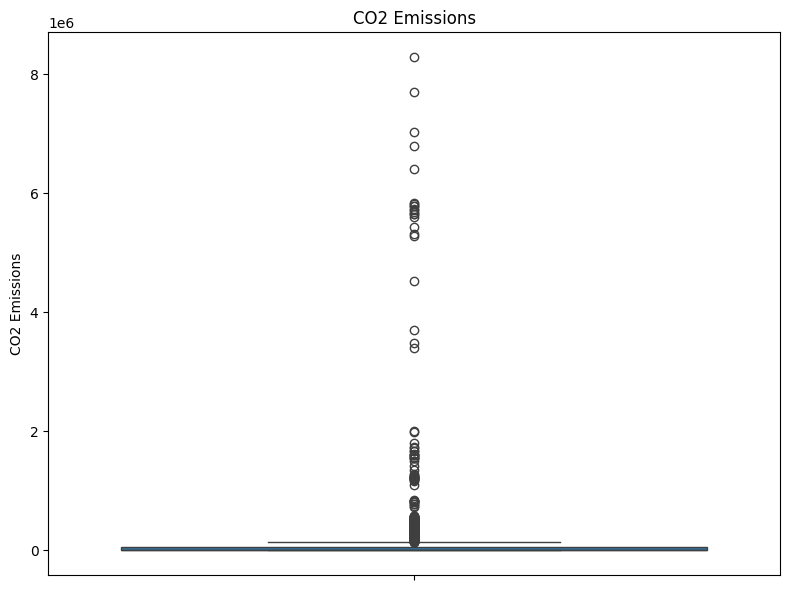

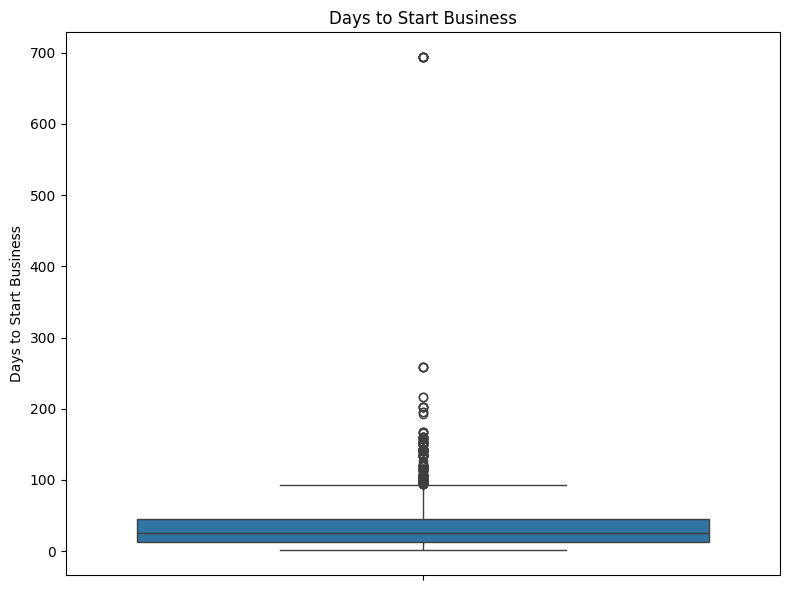

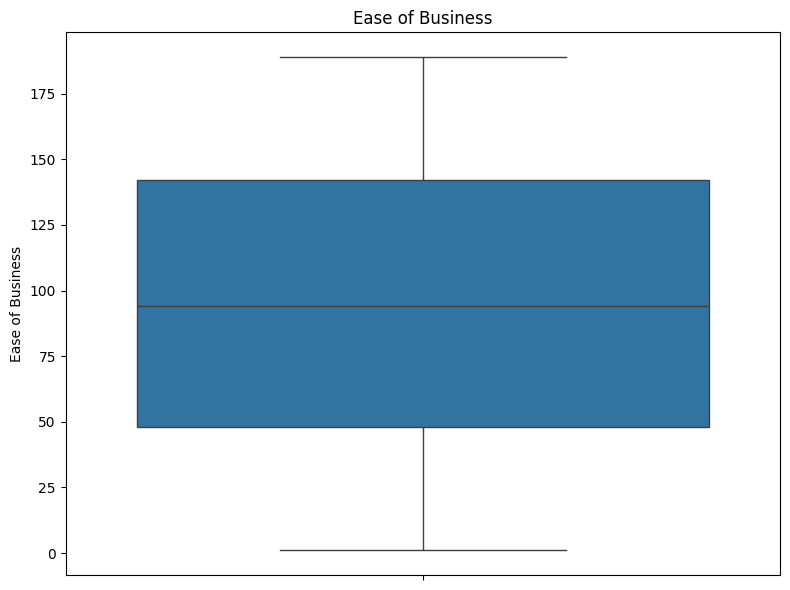

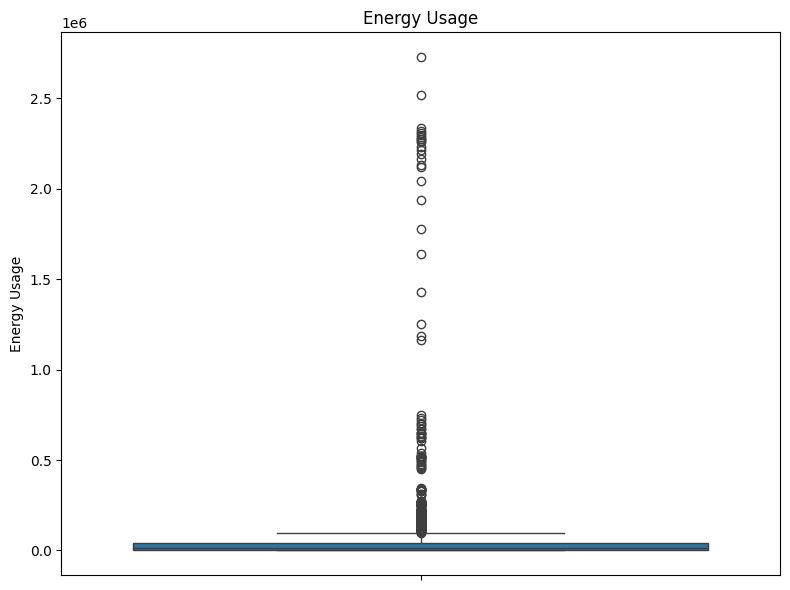

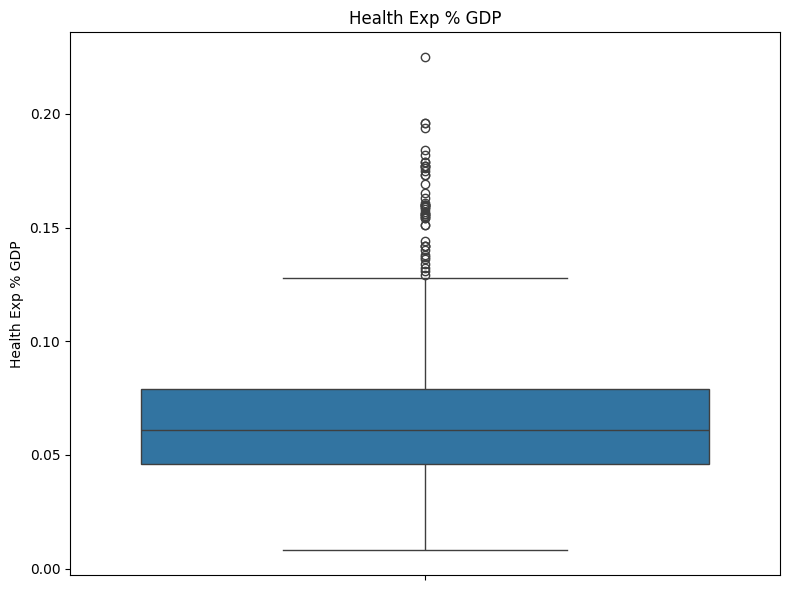

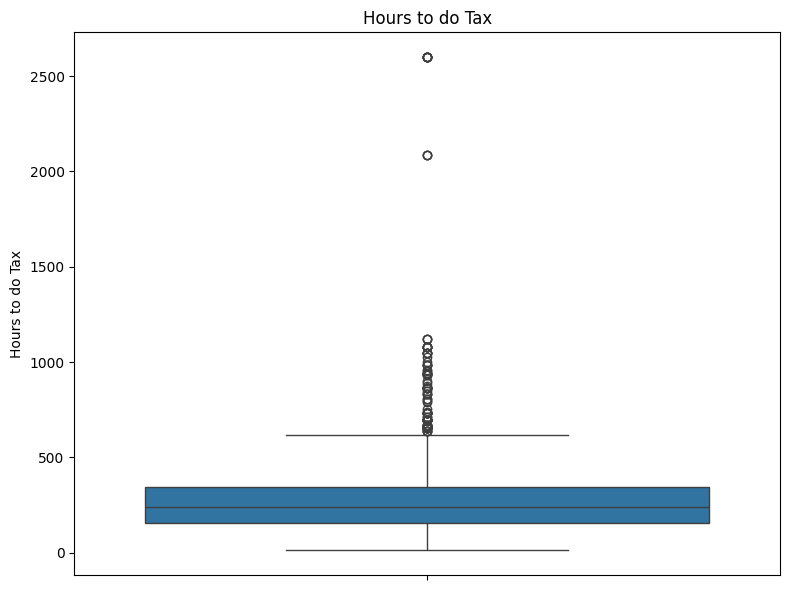

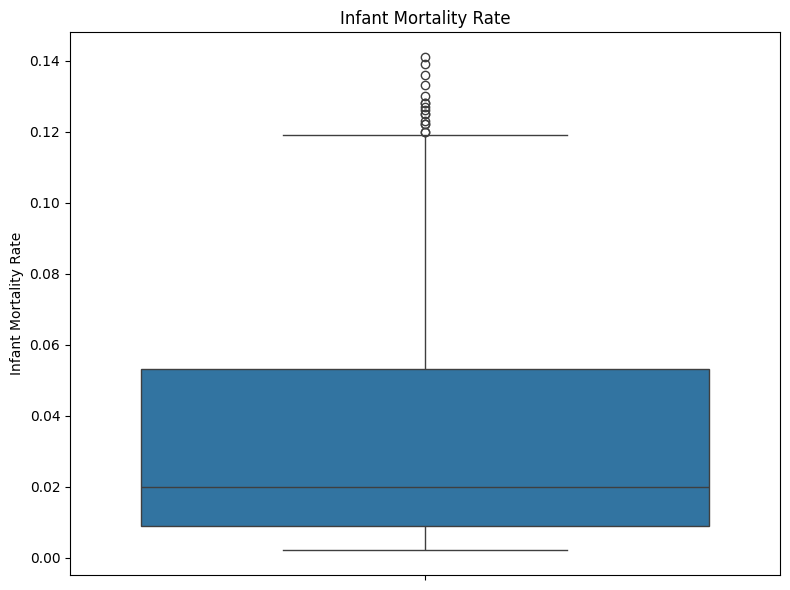

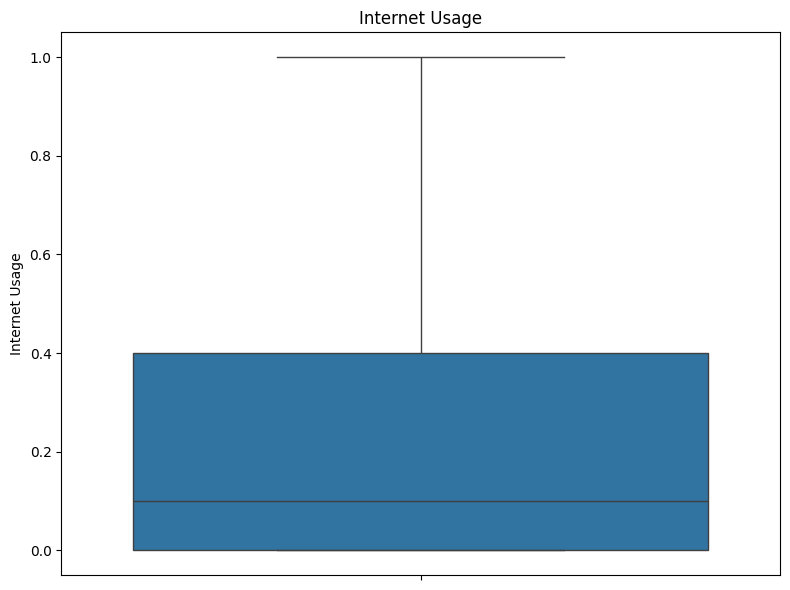

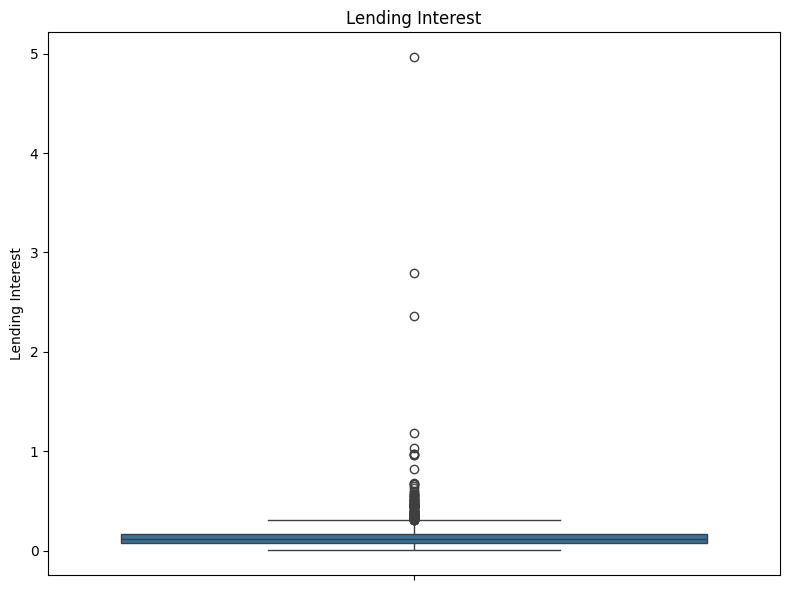

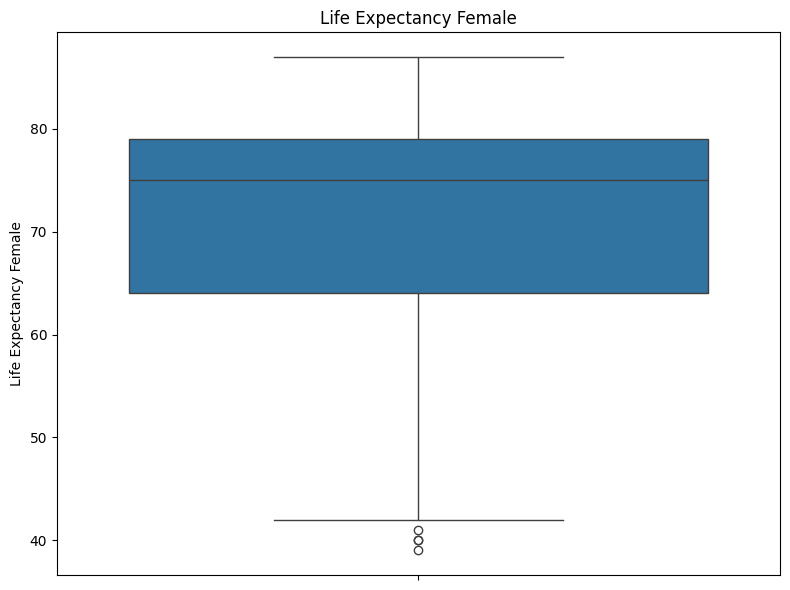

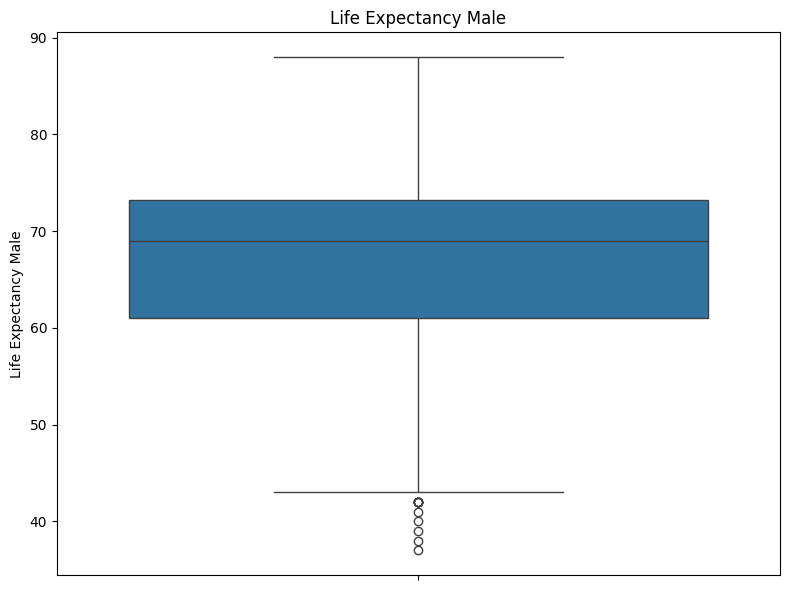

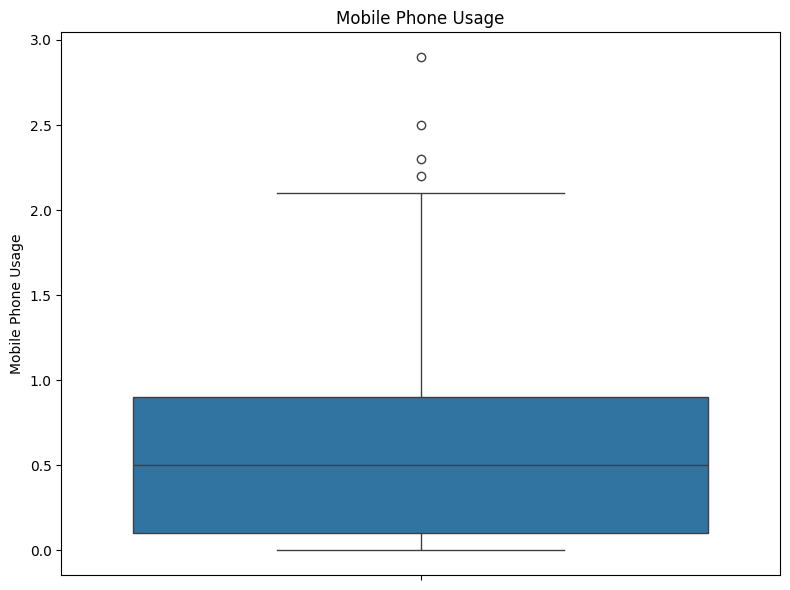

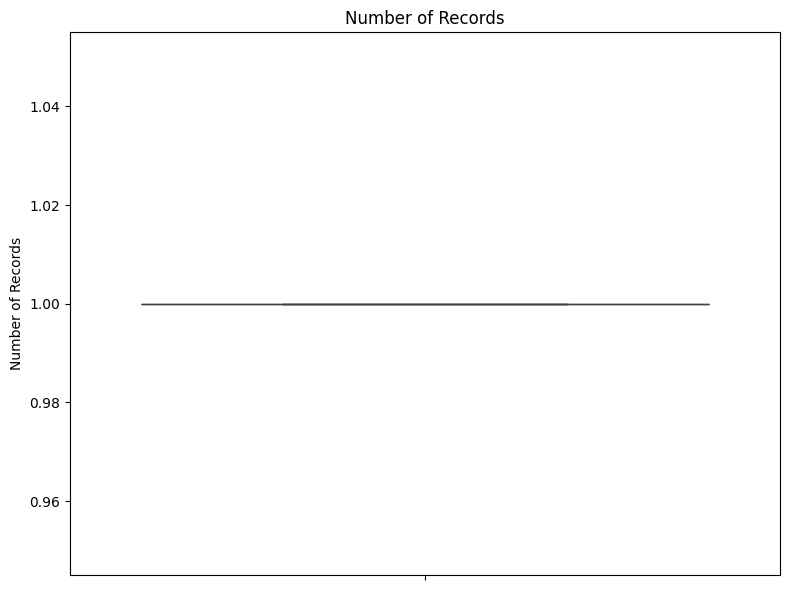

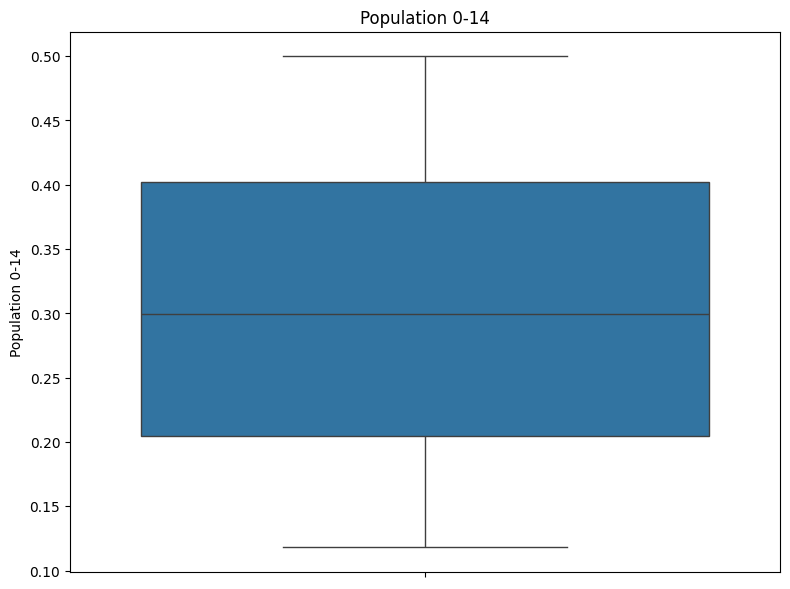

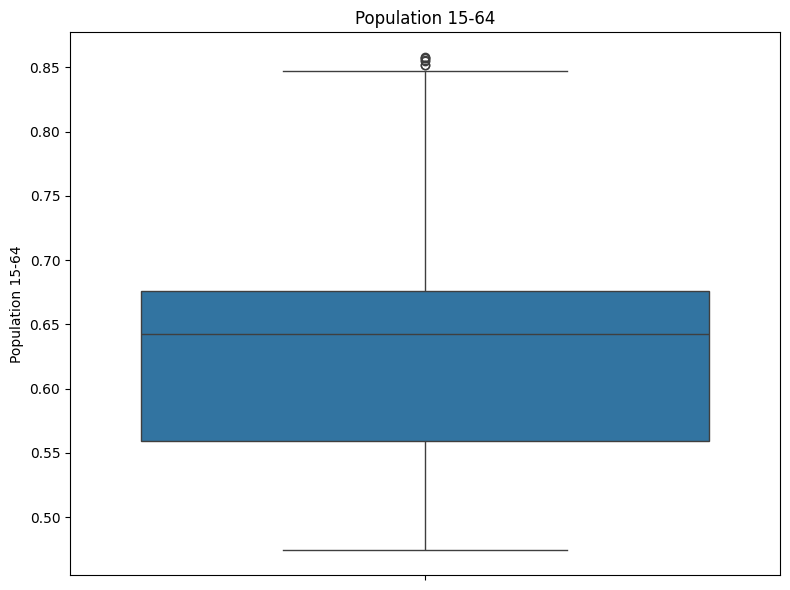

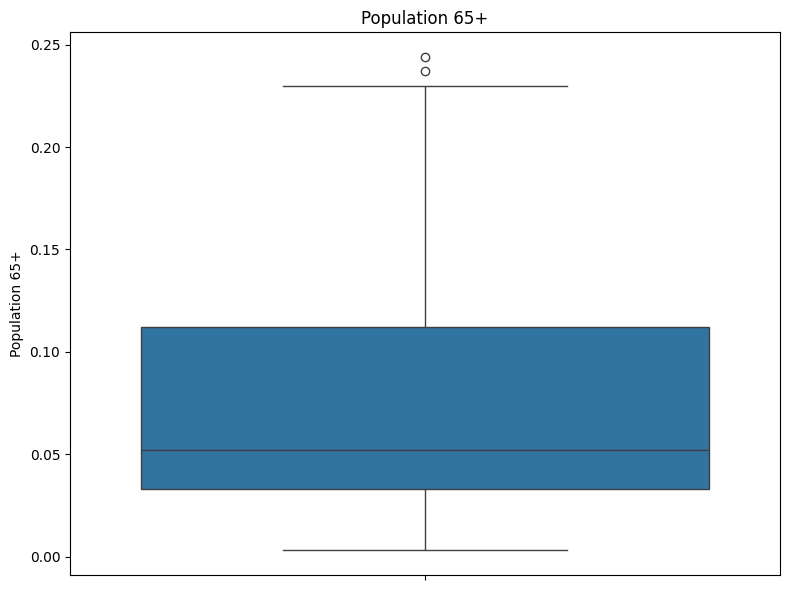

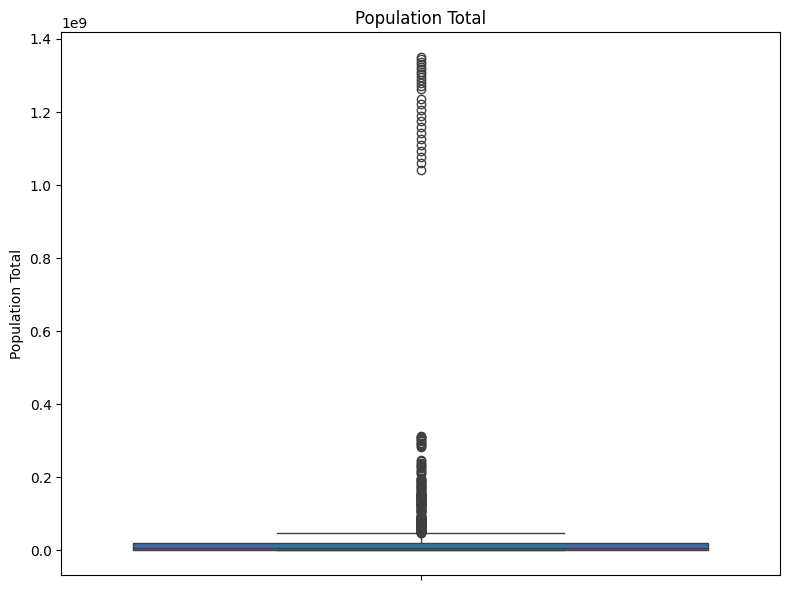

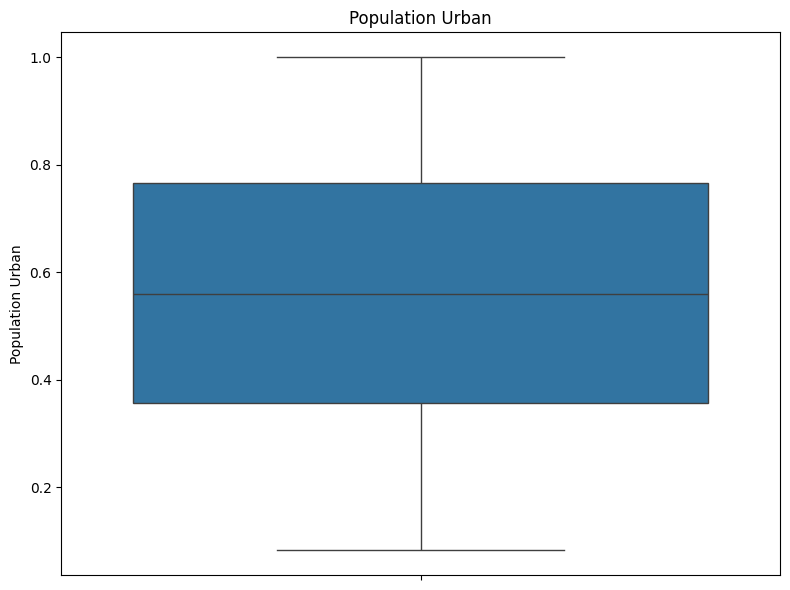

In [22]:
for col in numeric_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [23]:
# Histogram

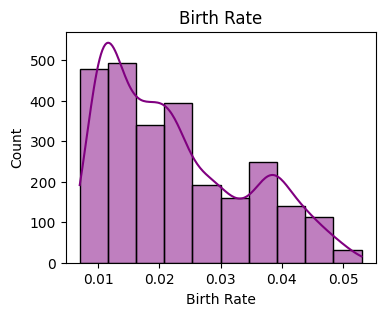

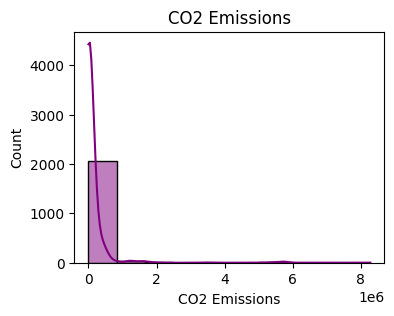

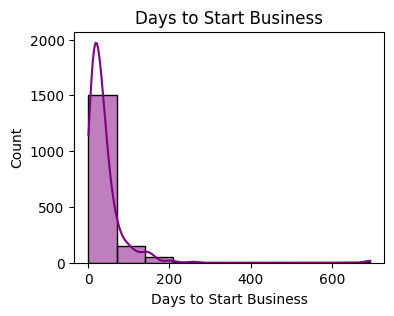

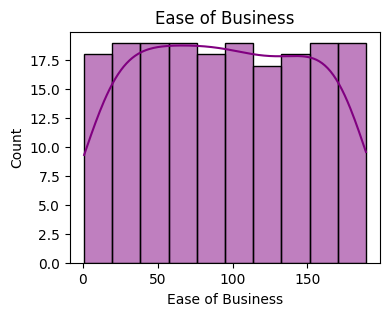

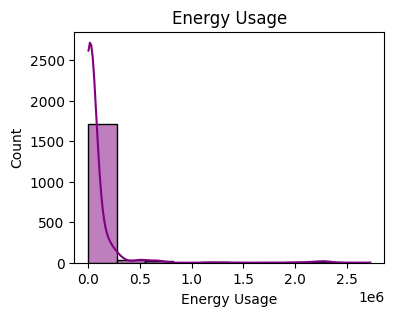

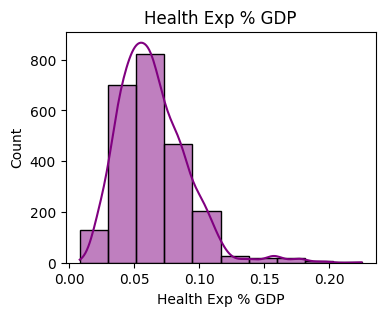

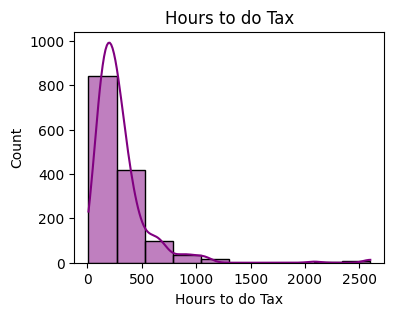

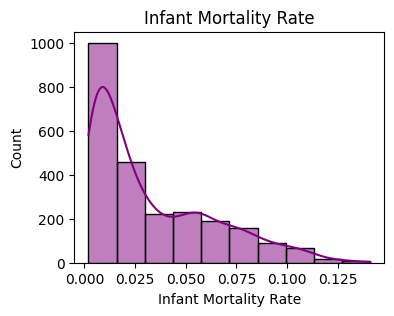

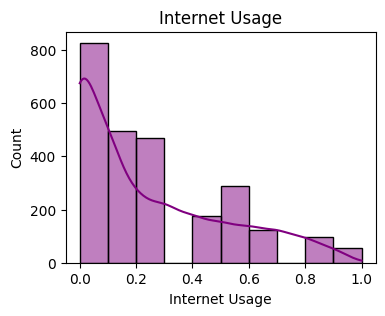

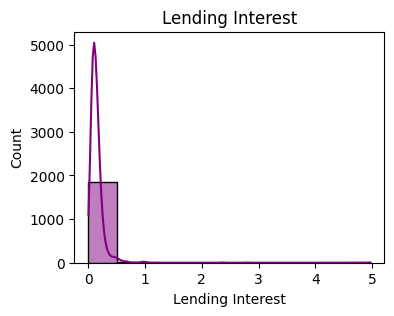

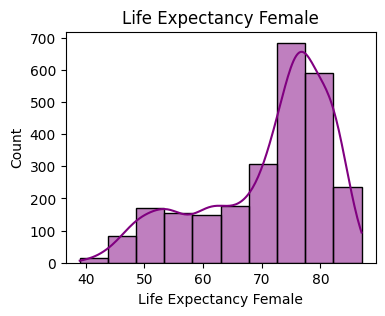

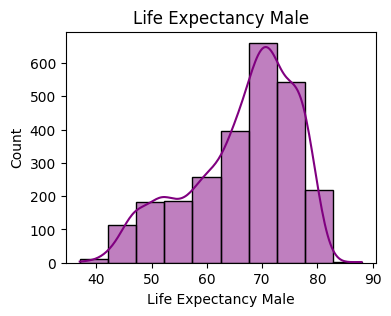

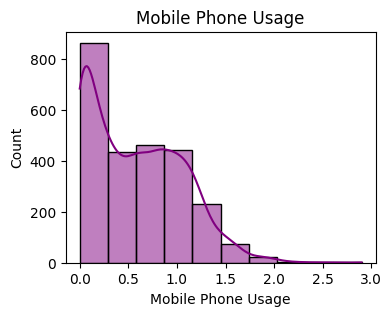

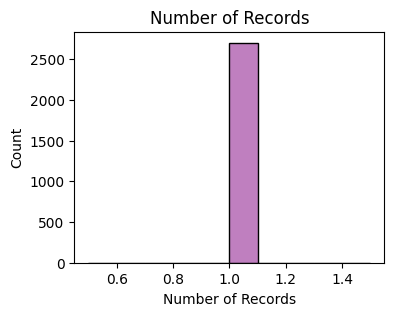

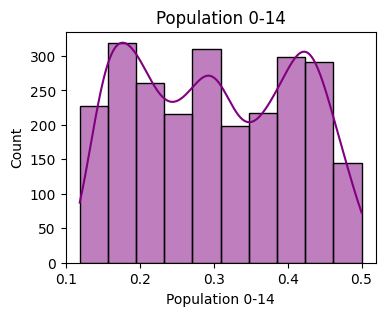

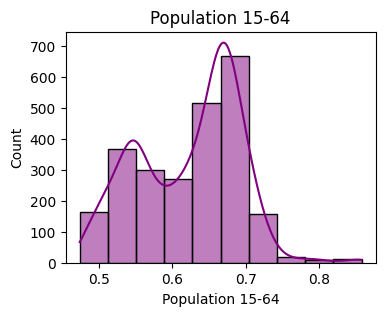

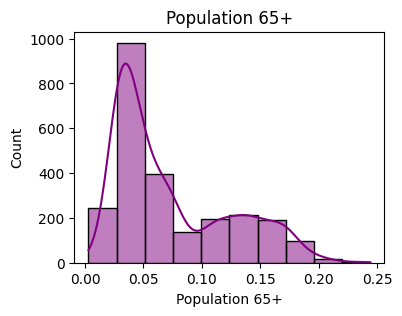

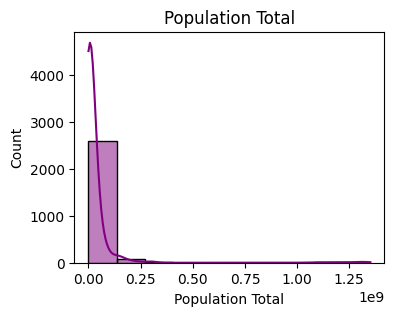

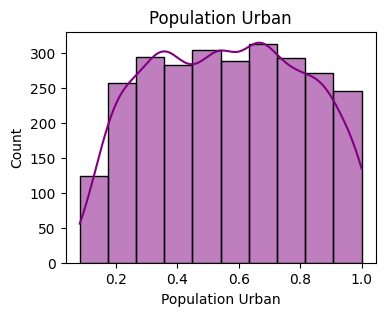

In [24]:
for col in numeric_cols:
    plt.figure(figsize=(4,3))
    sns.histplot(df[col],bins=10,color='purple',alpha=0.5,kde='true')
    plt.title(col)
    plt.show()

In [25]:
# Pair Plot

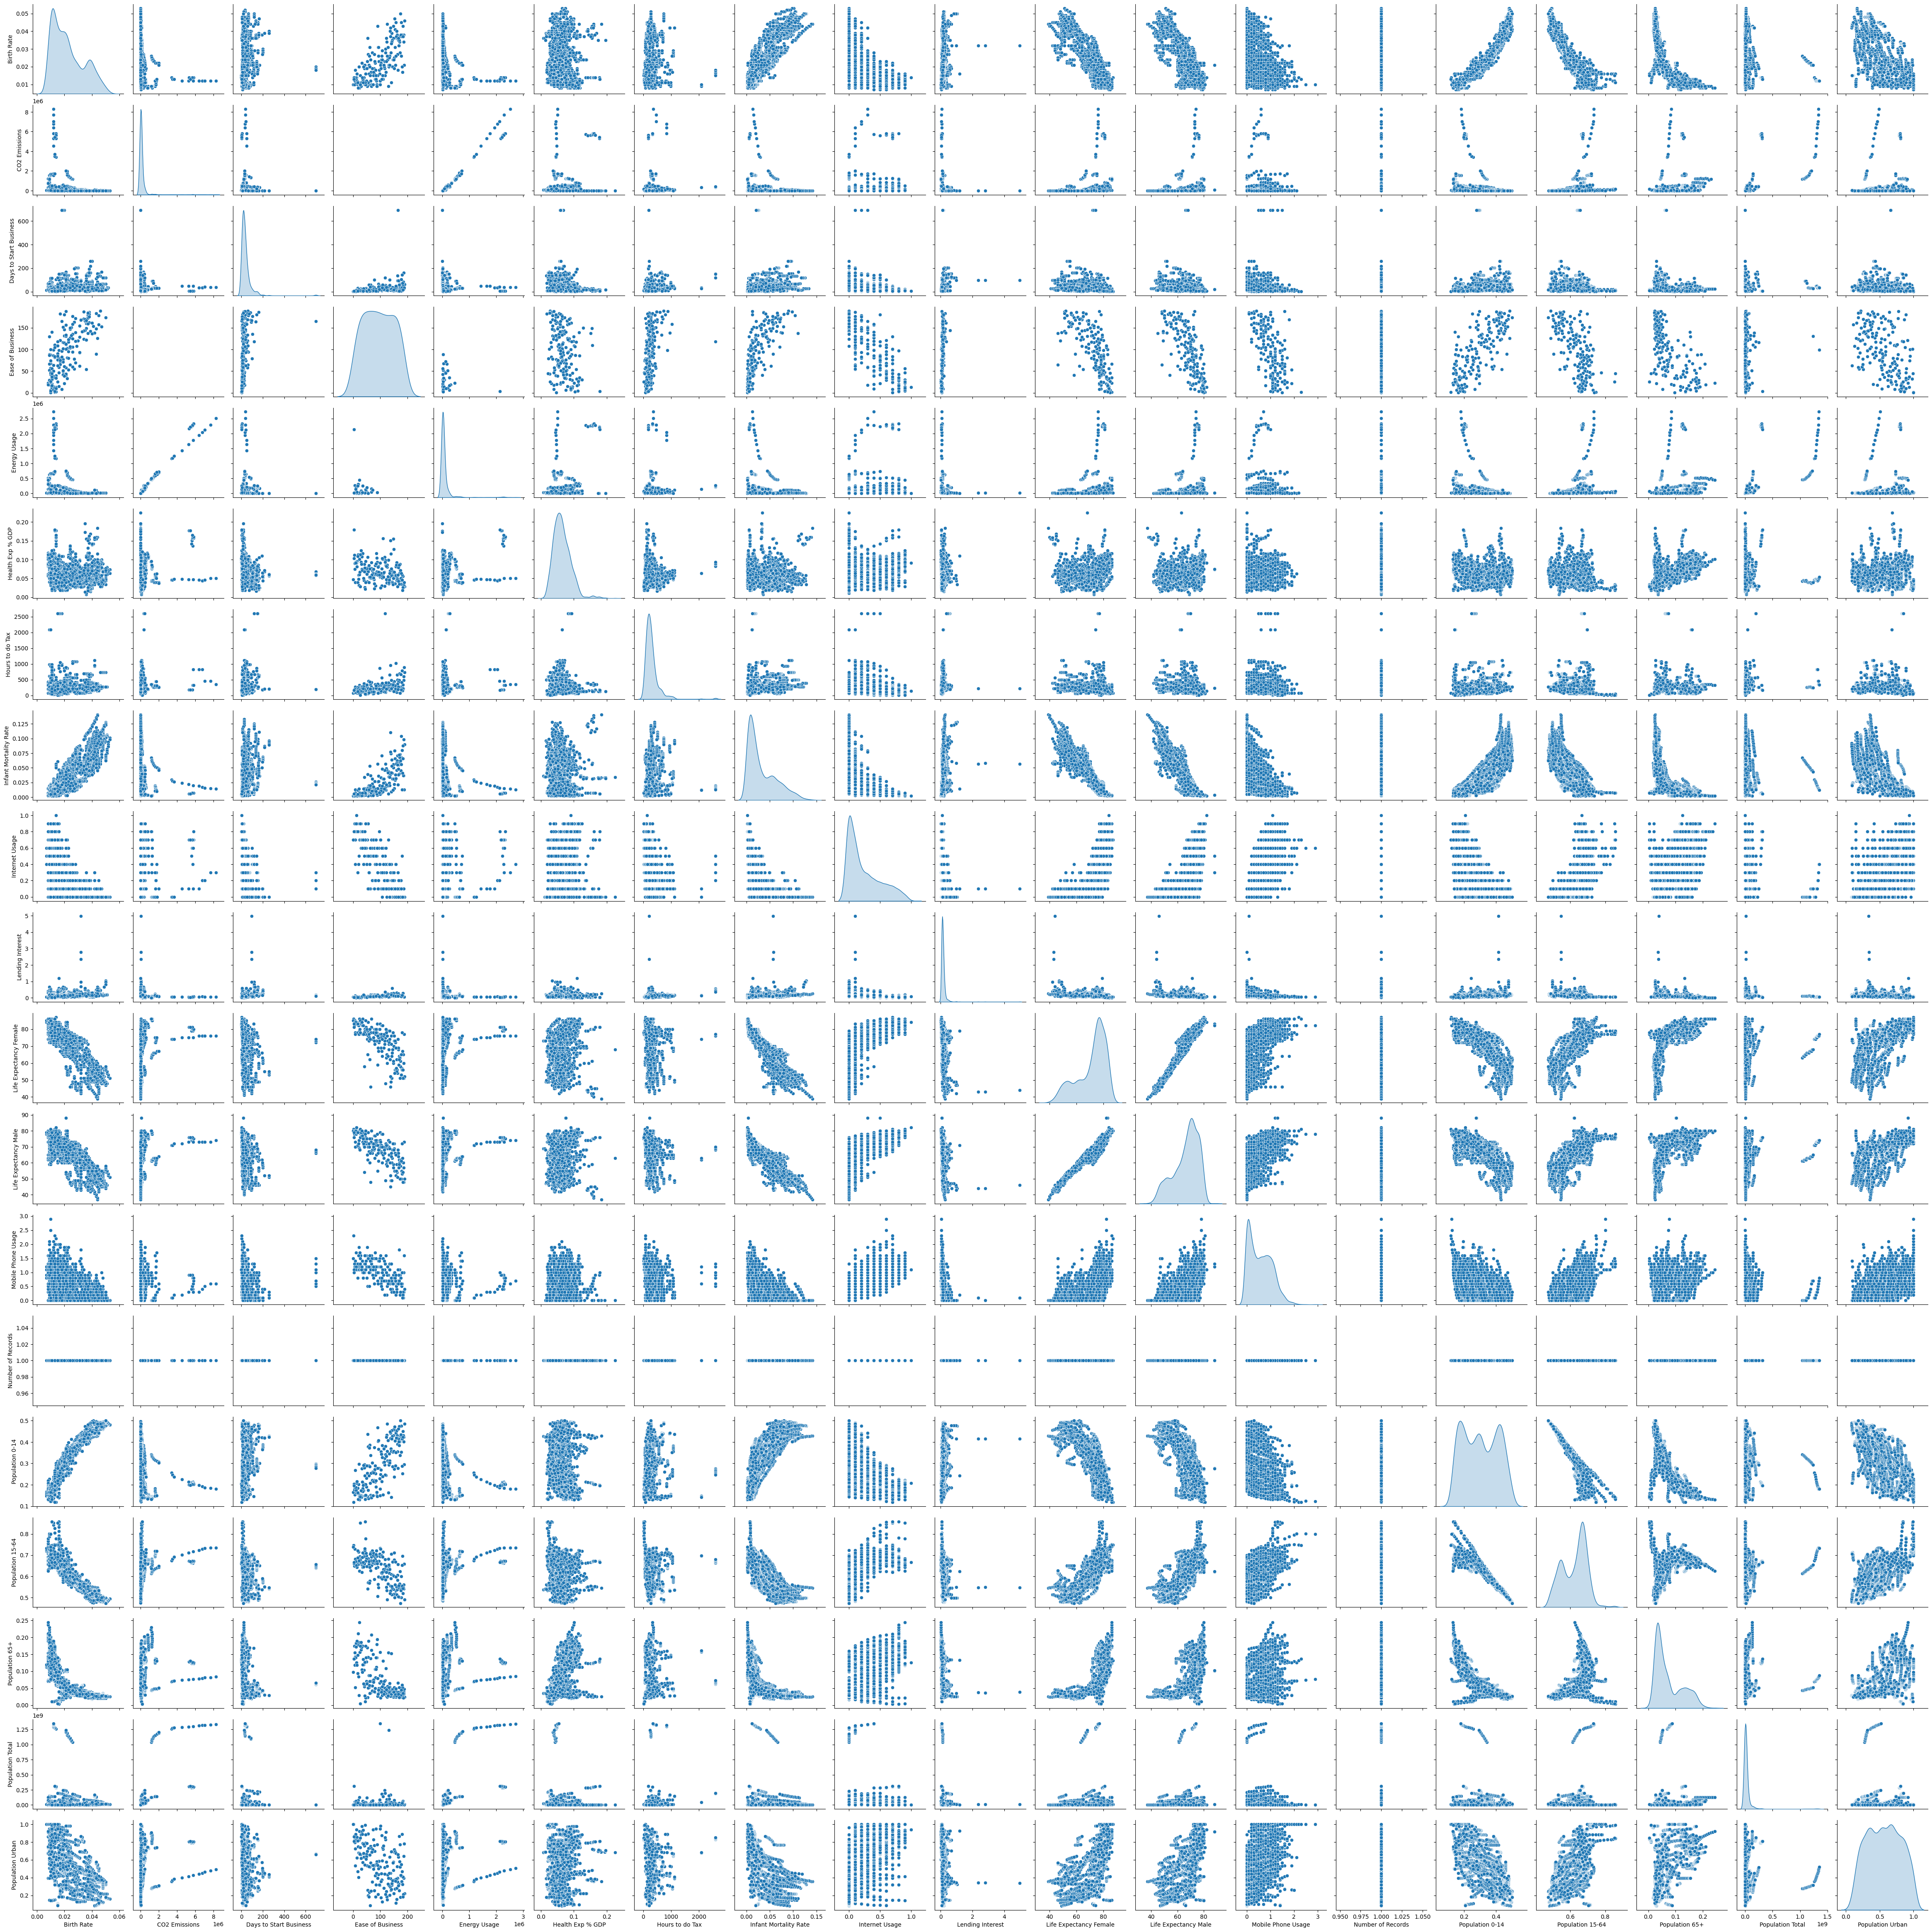

In [26]:
sns.pairplot(df[numeric_cols],diag_kind="kde")
plt.show()

In [27]:
df._get_numeric_data()

Birth Rate  CO2 Emissions  Days to Start Business  Ease of Business  \
0          0.020        87931.0                     NaN               NaN   
1          0.050         9542.0                     NaN               NaN   
2          0.043         1617.0                     NaN               NaN   
3          0.027         4276.0                     NaN               NaN   
4          0.046         1041.0                     NaN               NaN   
...          ...            ...                     ...               ...   
2699         NaN            NaN                     NaN               NaN   
2700       0.013            NaN                     5.0               4.0   
2701       0.015            NaN                     7.0              85.0   
2702       0.020            NaN                   144.0             180.0   
2703       0.011            NaN                     NaN               NaN   

      Energy Usage  Health Exp % GDP  Hours to do Tax  Infant Mortality Rate  \
0          26998.0             0.035              NaN                  0.034   
1           7499.0             0.034              NaN                  0.128   
2           1983.0             0.043              NaN                  0.090   
3           1836.0             0.047              NaN                  0.054   
4              NaN             0.051              NaN                  0.096   
...            ...               ...              ...                    ...   
2699           NaN               NaN              NaN                    NaN   
2700     2132446.0             0.179            175.0                  0.006   
2701           NaN             0.089            310.0                  0.010   
2702           NaN             0.046            792.0                  0.013   
2703           NaN               NaN              NaN                    NaN   

      Internet Usage  Lending Interest  Life Expectancy Female  \
0                0.0             0.100                    71.0   
1                0.0             1.032                    47.0   
2                0.0               NaN                    57.0   
3                0.0             0.155                    52.0   
4                0.0               NaN                    52.0   
...              ...               ...                     ...   
2699             NaN               NaN                     NaN   
2700             0.8             0.033                    81.0   
2701             0.5             0.112                    80.0   
2702             0.5             0.164                    78.0   
2703             0.4               NaN                    83.0   

      Life Expectancy Male  Mobile Phone Usage  Number of Records  \
0                     67.0                 0.0                  1   
1                     44.0                 0.0                  1   
2                     53.0                 0.0                  1   
3                     49.0                 0.1                  1   
4                     49.0                 0.0                  1   
...                    ...                 ...                ...   
2699                   NaN                 NaN                  1   
2700                  76.0                 1.0                  1   
2701                  74.0                 1.5                  1   
2702                  72.0                 1.0                  1   
2703                  76.0                 NaN                  1   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0               0.342             0.619           0.039          31719449   
1               0.476             0.499           0.025          13924930   
2               0.454             0.517           0.029           6949366   
3               0.383             0.587           0.029           1755375   
4               0.468             0.505           0.028          11607944   
...               ...               

In [28]:
corr=df._get_numeric_data().corr()                                 #Measure linear relationship between variables
corr

Birth Rate  CO2 Emissions  Days to Start Business  \
Birth Rate                1.000000      -0.175750                0.169013   
CO2 Emissions            -0.175750       1.000000               -0.055666   
Days to Start Business    0.169013      -0.055666                1.000000   
Ease of Business          0.727492            NaN                0.308789   
Energy Usage             -0.169664       0.988715               -0.069418   
Health Exp % GDP         -0.227653       0.163236               -0.147686   
Hours to do Tax           0.069324       0.081485                0.148423   
Infant Mortality Rate     0.872535      -0.135421                0.200082   
Internet Usage           -0.656132       0.137445               -0.243011   
Lending Interest          0.281503      -0.085876                0.146216   
Life Expectancy Female   -0.868174       0.135219               -0.197764   
Life Expectancy Male     -0.825745       0.141452               -0.213764   
Mobile Phone Usage       -0.558411       0.054400               -0.199868   
Number of Records              NaN            NaN                     NaN   
Population 0-14           0.955966      -0.198328                0.203978   
Population 15-64         -0.912837       0.190808               -0.166224   
Population 65+           -0.773014       0.160403               -0.201973   
Population Total         -0.057851       0.721145                0.001357   
Population Urban         -0.606933       0.098051               -0.092493   

                        Ease of Business  Energy Usage  Health Exp % GDP  \
Birth Rate                      0.727492     -0.169664         -0.227653   
CO2 Emissions                        NaN      0.988715          0.163236   
Days to Start Business          0.308789     -0.069418         -0.147686   
Ease of Business                1.000000     -0.234867         -0.278061   
Energy Usage                   -0.234867      1.000000          0.253146   
Health Exp % GDP               -0.278061      0.253146          1.000000   
Hours to do Tax                 0.346213      0.074673         -0.079755   
Infant Mortality Rate           0.731639     -0.120019         -0.165117   
Internet Usage                 -0.774005      0.154787          0.333544   
Lending Interest                0.488395     -0.085713         -0.028021   
Life Expectancy Female         -0.709671      0.125224          0.208335   
Life Expectancy Male           -0.706122      0.132984          0.219441   
Mobile Phone Usage             -0.582954      0.045198          0.187336   
Number of Records                    NaN           NaN               NaN   
Population 0-14                 0.741035     -0.184007         -0.292266   
Population 15-64               -0.631452      0.171528          0.093604   
Population 65+                 -0.646456      0.148971          0.489835   
Population Total                0.029175      0.677971         -0.054097   
Population Urban               -0.493255      0.094218          0.205994   

                        Hours to do Tax  Infant Mortality Rate  \
Birth Rate                     0.069324               0.872535   
CO2 Emissions                  0.081485              -0.135421   
Days to Start Business         0.148423               0.200082   
Ease of Business               0.346213               0.731639   
Energy Usage                   0.074673              -0.120019   
Health Exp % GDP              -0.079755              -0.165117   
Hours to do Tax                1.000000               0.133808   
Infant Mortality Rate          0.133808               1.000000   
Internet Usage                -0.200398              -0.639990   
Lending Interest               0.140826               0.304399   
Life Expectancy Female        -0.104772              -0.933001   
Life Expectancy Male          -0.154317              -0.912240   
Mobile Phone Usage            -0.103461              -0.599383   
Number of Records                   Na

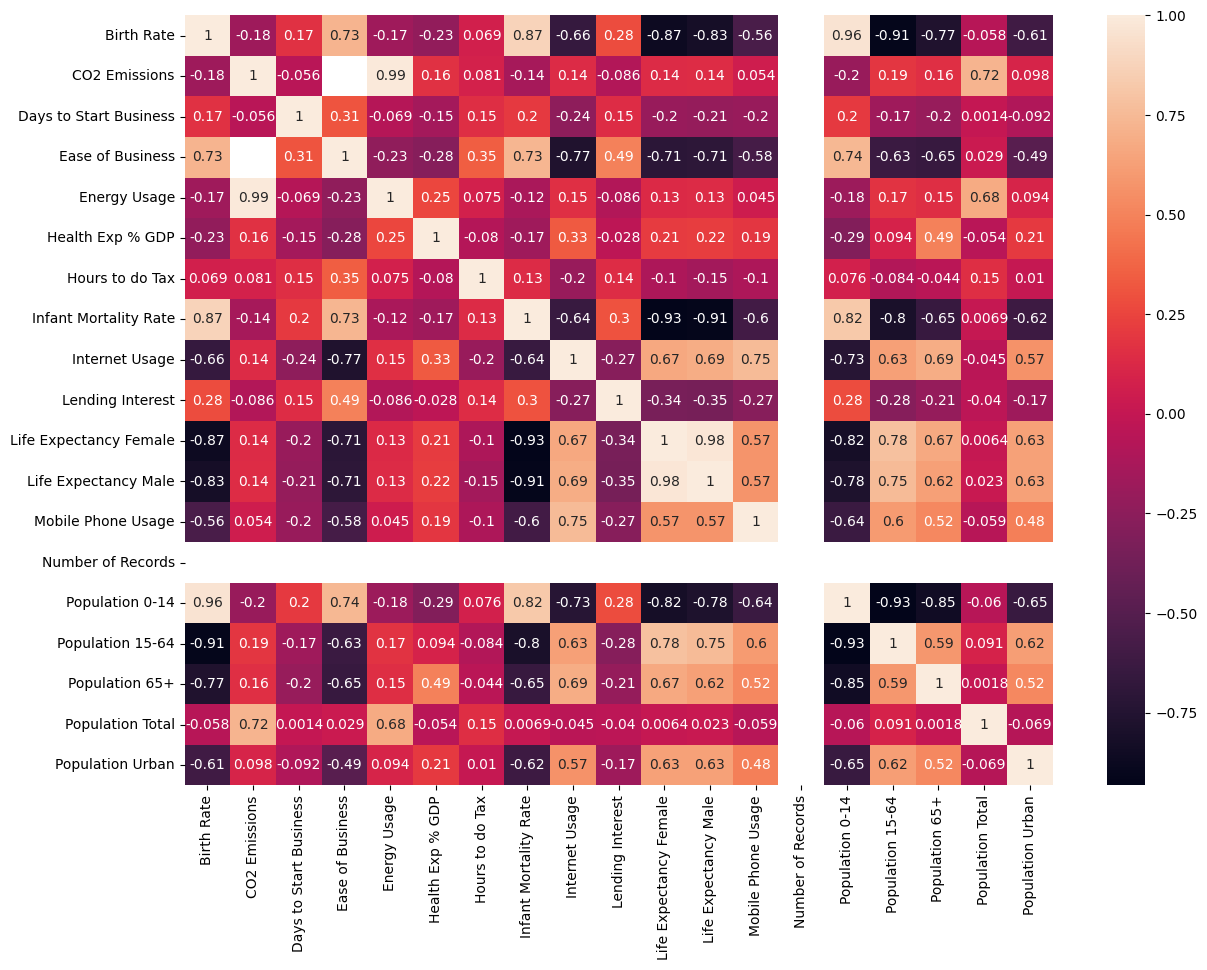

In [29]:
plt.figure(figsize=(14,10))
sns.heatmap(corr,annot=True)
plt.show()

In [30]:
# Cleaning the data

In [31]:
# Take the backup of original data

In [32]:
data=df.copy()

In [33]:
data.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [34]:
object_cols=data.select_dtypes(include='object').columns
object_cols=object_cols.drop('Country')                                  #country is removed as it is not a feature

In [35]:
for col in object_cols:
    data[col]=pd.to_numeric(data[col].str.replace(r'[%,$]','',regex=True),errors='coerce')

In [36]:
data.head()

Birth Rate  Business Tax Rate  CO2 Emissions       Country  \
0       0.020                NaN        87931.0       Algeria   
1       0.050                NaN         9542.0        Angola   
2       0.043                NaN         1617.0         Benin   
3       0.027                NaN         4276.0      Botswana   
4       0.046                NaN         1041.0  Burkina Faso   

   Days to Start Business  Ease of Business  Energy Usage           GDP  \
0                     NaN               NaN       26998.0  5.479006e+10   
1                     NaN               NaN        7499.0  9.129595e+09   
2                     NaN               NaN        1983.0  2.359122e+09   
3                     NaN               NaN        1836.0  5.788312e+09   
4                     NaN               NaN           NaN  2.610959e+09   

   Health Exp % GDP  Health Exp/Capita  ...  Life Expectancy Male  \
0             0.035               60.0  ...                  67.0   
1             0.034               22.0  ...                  44.0   
2             0.043               15.0  ...                  53.0   
3             0.047              152.0  ...                  49.0   
4             0.051               12.0  ...                  49.0   

   Mobile Phone Usage  Number of Records  Population 0-14  Population 15-64  \
0                 0.0                  1            0.342             0.619   
1                 0.0                  1            0.476             0.499   
2                 0.0                  1            0.454             0.517   
3                 0.1                  1            0.383             0.587   
4                 0.0                  1            0.468             0.505   

   Population 65+  Population Total  Population Urban  Tourism Inbound  \
0           0.039          31719449             0.599      102000000.0   
1           0.025          13924930             0.324       34000000.0   
2           0.029           6949366             0.383       77000000.0   
3           0.029           1755375             0.532      227000000.0   
4           0.028          11607944             0.178       23000000.0   

   Tourism Outbound  
0       193000000.0  
1       146000000.0  
2        50000000.0  
3       209000000.0  
4        30000000.0  

[5 rows x 25 columns]

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   float64
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   float64
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [38]:
data.duplicated().sum()

0

In [39]:
# Handling NULL Values

In [40]:
num_col=data.select_dtypes(include=np.number).columns
num_col

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [41]:
data[num_col]=data[num_col].fillna(data[num_col].median(numeric_only=True))

In [42]:
data.isnull().sum()

Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Country                   0
Days to Start Business    0
Ease of Business          0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Number of Records         0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

In [43]:
# Outlier detection using IQR Method

In [44]:
Q1=data[num_col].quantile(0.25)
Q3=data[num_col].quantile(0.75)
IQR = Q3-Q1



In [45]:
upper_lim=Q3+1.5*IQR
lower_lim=Q1-1.5*IQR

In [46]:
outliers=(data[num_col]<lower_lim)|(data[num_col]>upper_lim)
outliers.sum().sort_values(ascending=False)

Business Tax Rate         1130
Hours to do Tax            980
Tourism Outbound           461
Energy Usage               424
GDP                        414
Health Exp/Capita          412
Tourism Inbound            409
CO2 Emissions              387
Days to Start Business     340
Population Total           318
Lending Interest           245
Ease of Business           184
Health Exp % GDP            58
Infant Mortality Rate       49
Life Expectancy Female      14
Life Expectancy Male        11
Mobile Phone Usage          11
Population 15-64             9
Population 65+               5
Internet Usage               0
Number of Records            0
Population 0-14              0
Population Urban             0
Birth Rate                   0
dtype: int64

In [47]:
# Treating Outliers

In [48]:
data[num_col]=np.where(data[num_col]<(lower_lim),lower_lim,data[num_col])
data[num_col]=np.where(data[num_col]>(upper_lim),upper_lim,data[num_col])

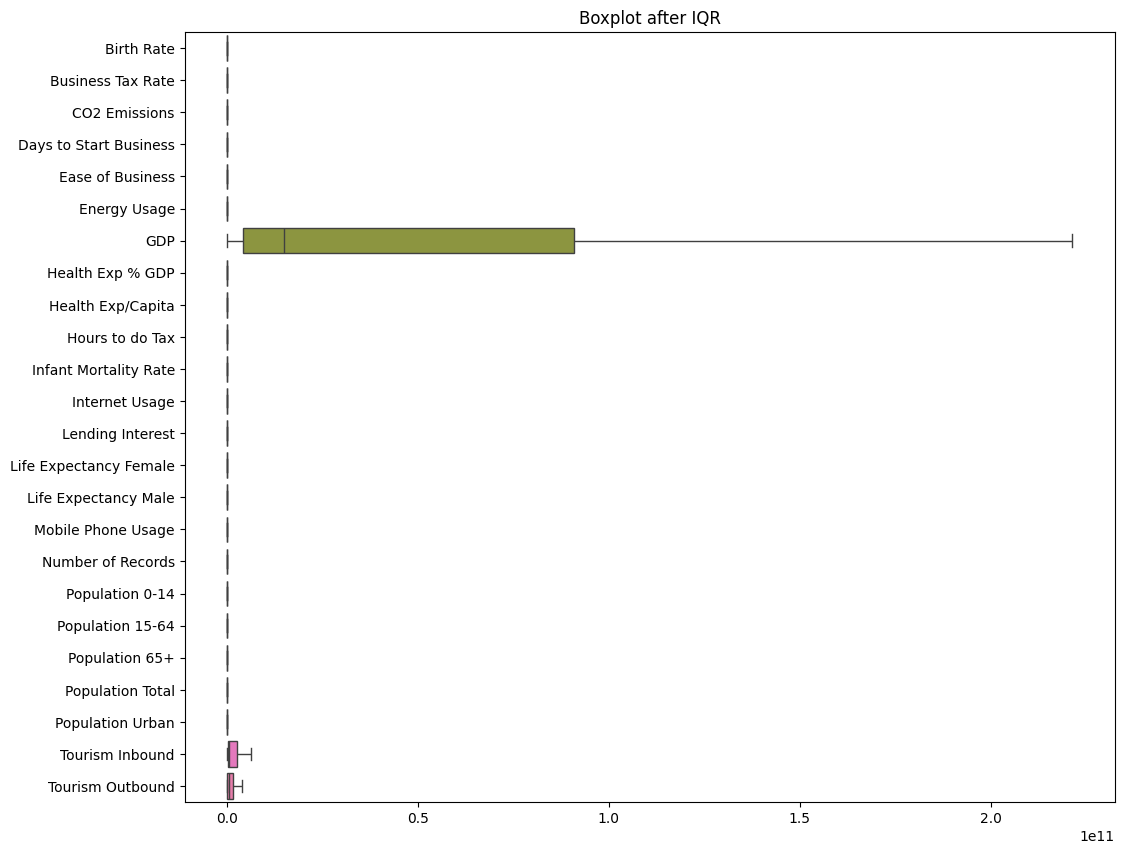

In [49]:
plt.figure(figsize=(12,10))
sns.boxplot(data[num_col],orient='h')
plt.title('Boxplot after IQR')
plt.show()

In [50]:
# Preprocessing

In [51]:
data_model=data.drop(columns=['Country','Number of Records'])                    #country is removed before modeling as it a identifier not a numeric value

In [52]:
num_cl=data_model.select_dtypes(include=np.number).columns

In [53]:
scaler=StandardScaler()      #bring all features to mean 0 and standard deviation 1

In [54]:
scaled_data=scaler.fit_transform(data_model[num_cl])

In [55]:
scaled_df=pd.DataFrame(scaled_data,columns=num_cl)

In [56]:
scaled_df.head()

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
0   -0.233864          -0.064792       1.659733               -0.151075   
1    2.469335          -0.064792      -0.486142               -0.151075   
2    1.838589          -0.064792      -0.703087               -0.151075   
3    0.396882          -0.064792      -0.630298               -0.151075   
4    2.108909          -0.064792      -0.718855               -0.151075   

   Ease of Business  Energy Usage       GDP  Health Exp % GDP  \
0               0.0      0.590969 -0.060055         -1.266291   
1               0.0     -0.729010 -0.620533         -1.311467   
2               0.0     -1.102414 -0.703641         -0.904880   
3               0.0     -1.112365 -0.661547         -0.724175   
4               0.0     -0.266046 -0.700549         -0.543469   

   Health Exp/Capita  Hours to do Tax  ...  Life Expectancy Female  \
0          -0.746454        -0.048822  ...               -0.034833   
1          -0.831569        -0.048822  ...               -2.334437   
2          -0.847248        -0.048822  ...               -1.376268   
3          -0.540387        -0.048822  ...               -1.855353   
4          -0.853967        -0.048822  ...               -1.855353   

   Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0              0.043864           -1.253652         0.384182   
1             -2.472735           -1.253652         1.696192   
2             -1.487979           -1.253652         1.480788   
3             -1.925648           -1.034604         0.785618   
4             -1.925648           -1.253652         1.617863   

   Population 15-64  Population 65+  Population Total  Population Urban  \
0         -0.089411       -0.684821          1.090800          0.147449   
1         -1.886942       -0.978160          0.021270         -0.976530   
2         -1.617312       -0.894348         -0.397993         -0.735385   
3         -0.568753       -0.894348         -0.710175         -0.126393   
4         -1.797065       -0.915301         -0.117991         -1.573260   

   Tourism Inbound  Tourism Outbound  
0        -0.754222         -0.670804  
1        -0.783976         -0.702383  
2        -0.765161         -0.766886  
3        -0.699527         -0.660053  
4        -0.788789         -0.780324  

[5 rows x 23 columns]

In [57]:
# Hyperparameter Tuning - Finding the right k


In [58]:
from sklearn.cluster import KMeans

In [59]:
wcss=[]                                #within cluster sum of squares,how far data points are from the centroid of their respective clusters.
for i in range(1,11):
    hmodel=KMeans(n_clusters=i)
    hmodel.fit(scaled_df)
    wcss.append(hmodel.inertia_)
wcss
    

[59488.0,
 40922.448598938696,
 31968.906498061016,
 28385.296352780475,
 26036.914517161793,
 24920.702325273265,
 24149.962290025705,
 23252.64824063363,
 22854.748060290112,
 21657.530179837457]

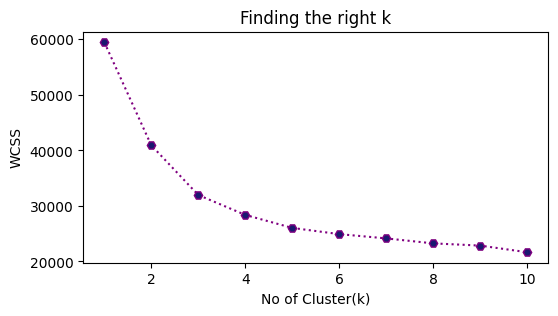

In [60]:
plt.figure(figsize=(6,3))
plt.title('Finding the right k')
plt.xlabel('No of Cluster(k)')
plt.ylabel('WCSS')
plt.plot(range(1,11),wcss,color='purple',marker='H',markerfacecolor='midnightblue',linestyle='dotted')
plt.show()

In [61]:
# From the elbow point,the optimal no of clusters are found to be 3

In [62]:
hmodel=KMeans(n_clusters=3,random_state=42)
hmodel.fit(scaled_df)

KMeans(n_clusters=3, random_state=42)

In [63]:
wcss=hmodel.inertia_
wcss

31967.862375601944

In [64]:
hmodel.labels_

array([0, 2, 2, ..., 0, 0, 0], dtype=int32)

In [65]:
data['K_Label']=hmodel.labels_          #assigns the cluster label of each data point to the original dataset

In [66]:
grp=data.groupby('K_Label')             #groups the dataset based on the cluster labels

In [67]:
data[['Country','K_Label']].head()

Country  K_Label
0       Algeria        0
1        Angola        2
2         Benin        2
3      Botswana        2
4  Burkina Faso        2

In [68]:
for x,y in grp:
    print (y)
    print('-'*50)

      Birth Rate  Business Tax Rate  CO2 Emissions                   Country  \
0          0.020              41.00        87931.0                   Algeria   
26         0.022              41.00        47114.0                     Libya   
31         0.017              41.00         2769.0                 Mauritius   
32         0.022              41.00        33905.0                   Morocco   
40         0.019              41.00          565.0                Seychelles   
...          ...                ...            ...                       ...   
2698       0.015              37.55         8529.0       Trinidad and Tobago   
2699       0.020              41.00         8529.0  Turks and Caicos Islands   
2701       0.015              41.90         8529.0                   Uruguay   
2702       0.020              45.15         8529.0             Venezuela, RB   
2703       0.011              41.00         8529.0     Virgin Islands (U.S.)   

      Days to Start Business  Ease of B

In [69]:
#mean of numerical features for each cluster, which helps in understanding the characteristics and behavior of each cluster

In [70]:
grp[num_col].agg('mean')                         

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
K_Label                                                                         
0          0.017230          40.835501   17173.047639               26.536143   
1          0.013952          41.617241   72334.812808               22.804187   
2          0.035815          41.307489   10182.043919               33.979307   

         Ease of Business  Energy Usage           GDP  Health Exp % GDP  \
K_Label                                                                   
0                    94.0  12389.623239  2.369929e+10          0.061616   
1                    94.0  38235.846470  1.960480e+11          0.074299   
2                    94.0  12564.180462  1.507126e+10          0.057223   

         Health Exp/Capita  Hours to do Tax  ...  Life Expectancy Male  \
K_Label                                      ...                         
0               391.065555       237.678749  ...             70.645402   
1               871.737890       238.080049  ...             73.655172   
2                68.095721       246.520270  ...             56.260135   

         Mobile Phone Usage  Number of Records  Population 0-14  \
K_Label                                                           
0                  0.662303                1.0         0.264694   
1                  0.901888                1.0         0.206993   
2                  0.223986                1.0         0.420185   

         Population 15-64  Population 65+  Population Total  Population Urban  \
K_Label                                                                         
0                0.657350        0.076838      5.626071e+06          0.631248   
1                0.675319        0.117331      2.868855e+07          0.735831   
2                0.546426        0.033374      1.400239e+07          0.351475   

         Tourism Inbound  Tourism Outbound  
K_Label                                     
0           1.094645e+09      5.639791e+08  
1           5.435658e+09      3.714938e+09  
2           3.436477e+08      3.134205e+08  

[3 rows x 24 columns]

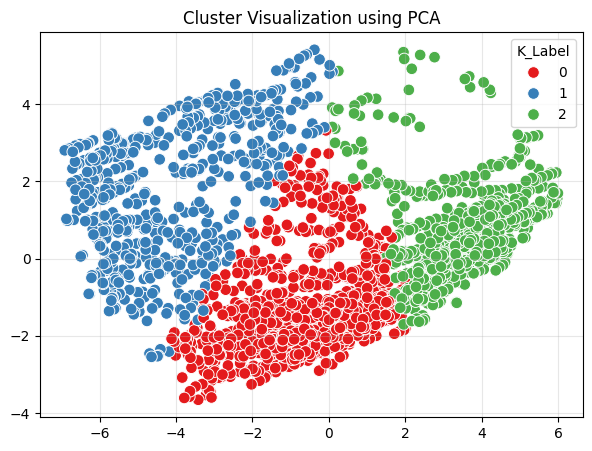

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

plt.figure(figsize=(7,5))
sns.scatterplot(
    x=pca_data[:,0],
    y=pca_data[:,1],
    hue=data['K_Label'],
    palette='Set1',
    s=70
)

plt.title("Cluster Visualization using PCA")
plt.grid(alpha=0.3)
plt.show()

In [72]:
# Silhouette Score                silhouette score measures how well data points are assigned to their clusters

In [73]:
from sklearn.metrics import silhouette_score

In [74]:
score=silhouette_score(scaled_df,data['K_Label'])
score

0.25677007958366566

In [75]:
# Hierarchial Agglomerative Clustering

In [76]:
from sklearn.cluster import AgglomerativeClustering

In [77]:
from scipy.cluster import hierarchy

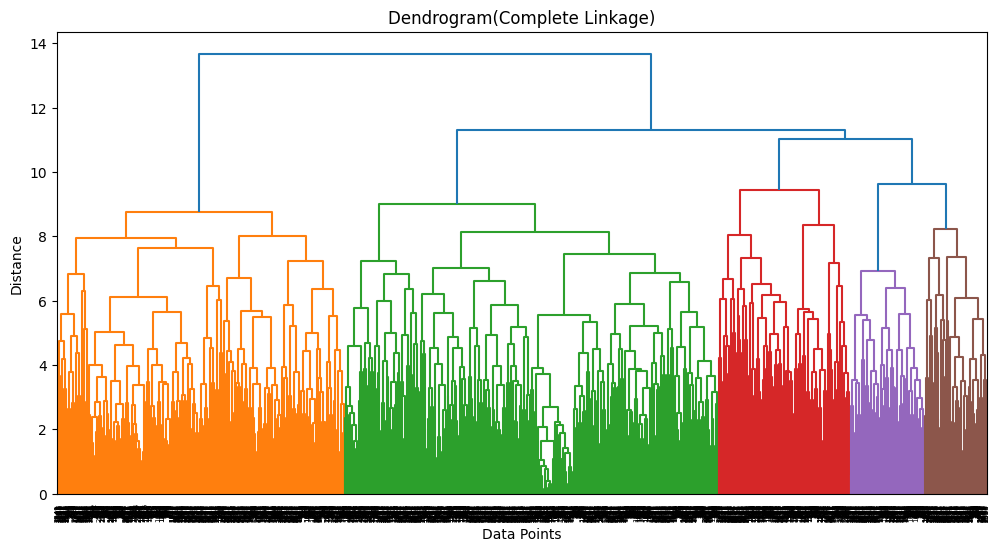

In [78]:
hr=hierarchy.linkage(scaled_df,method='complete',metric='euclidean')
plt.figure(figsize=(12,6))
dn=hierarchy .dendrogram(hr)
plt.title('Dendrogram(Complete Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [79]:
model=AgglomerativeClustering(n_clusters=3,linkage='complete',metric='euclidean')
model.fit(scaled_df)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [80]:
model.labels_

array([0, 1, 1, ..., 2, 0, 2])

In [81]:
data['HAC_Label']=model.labels_

In [82]:
data[['Country','HAC_Label']].head()

Country  HAC_Label
0       Algeria          0
1        Angola          1
2         Benin          1
3      Botswana          1
4  Burkina Faso          1

In [83]:
grp_h=data.groupby('HAC_Label')    #groups the dataset based on hierarchical clustering labels

In [84]:
for x,y in grp_h:
    print(y)
    print('-'*70)

      Birth Rate  Business Tax Rate  CO2 Emissions           Country  \
0          0.020              41.00        87931.0           Algeria   
14         0.025              41.00       103049.5  Egypt, Arab Rep.   
32         0.022              41.00        33905.0           Morocco   
43         0.024              41.00       103049.5      South Africa   
49         0.017              41.00        19923.0           Tunisia   
...          ...                ...            ...               ...   
2686       0.019              45.15         8529.0            Mexico   
2690       0.020              37.55         8529.0              Peru   
2691       0.011              45.15         8529.0       Puerto Rico   
2700       0.013              45.15         8529.0     United States   
2702       0.020              45.15         8529.0     Venezuela, RB   

      Days to Start Business  Ease of Business  Energy Usage           GDP  \
0                     26.000              94.0     26998.

In [85]:
num_col_clean = data.select_dtypes(include='number').columns.drop(
    ['K_Label', 'HAC_Label'], errors='ignore'
)

In [86]:
data.groupby('HAC_Label')[num_col_clean].mean()   #mean of numerical variables for each hierarchical cluster,

Birth Rate  Business Tax Rate  CO2 Emissions  \
HAC_Label                                                 
0            0.015743          41.566239   71068.202182   
1            0.036321          41.327718    6802.765233   
2            0.016942          40.756434   11732.886489   

           Days to Start Business  Ease of Business  Energy Usage  \
HAC_Label                                                           
0                       23.595154              94.0  36485.660462   
1                       34.781959              94.0  11235.421147   
2                       26.284352              94.0  10634.670037   

                    GDP  Health Exp % GDP  Health Exp/Capita  Hours to do Tax  \
HAC_Label                                                                       
0          1.674696e+11          0.066933         695.327824       238.665276   
1          1.152120e+10          0.056859          70.905615       246.293907   
2          1.955839e+10          0.064983         424.967946       237.785616   

           ...  Life Expectancy Male  Mobile Phone Usage  Number of Records  \
HAC_Label  ...                                                                
0          ...             71.824134            0.784275                1.0   
1          ...             56.081243            0.228076                1.0   
2          ...             70.949449            0.685386                1.0   

           Population 0-14  Population 15-64  Population 65+  \
HAC_Label                                                      
0                 0.229167          0.668353        0.102152   
1                 0.422524          0.544486        0.032969   
2                 0.263323          0.655822        0.079653   

           Population Total  Population Urban  Tourism Inbound  \
HAC_Label                                                        
0              2.891576e+07          0.694194     4.423379e+09   
1              1.297723e+07          0.352271     3.205153e+08   
2              3.041164e+06          0.630992     1.123740e+09   

           Tourism Outbound  
HAC_Label                    
0              3.031382e+09  
1              2.768863e+08  
2              5.774233e+08  

[3 rows x 24 columns]

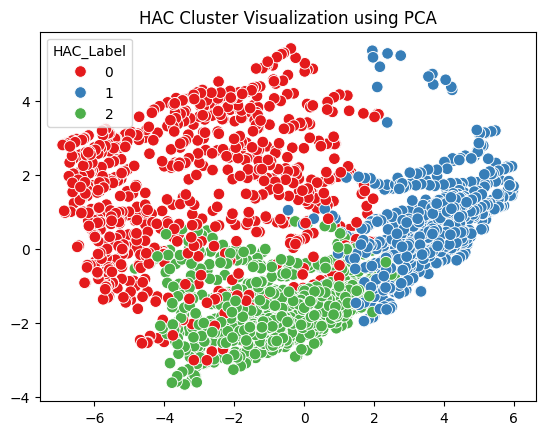

In [87]:
sns.scatterplot(
    x=pca_data[:,0],
    y=pca_data[:,1],
    hue=data['HAC_Label'],
    palette='Set1',
    s=70
)
plt.title("HAC Cluster Visualization using PCA")
plt.show()

In [88]:
# Silhouette Score

In [89]:
silhouette_score(scaled_df,data['HAC_Label'])   #quality of hierarchical clustering

0.22305782021971496

In [90]:
#DBSCAN

In [91]:
from sklearn.cluster import DBSCAN

In [92]:
#k-distance curve

In [93]:
from sklearn.neighbors import NearestNeighbors

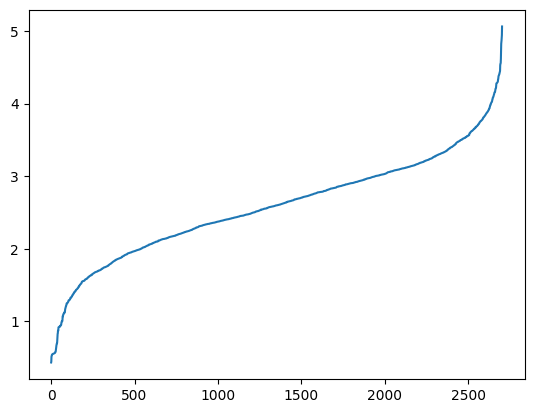

In [94]:
k = 25
nbrs = NearestNeighbors(n_neighbors=k).fit(scaled_df)
distances, _ = nbrs.kneighbors(scaled_df)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()


In [95]:
model_d=DBSCAN(eps=1.5,min_samples=15,metric='euclidean')
model_d.fit(scaled_df)

DBSCAN(eps=1.5, min_samples=15)

In [96]:
model_d.labels_

array([-1,  0,  0, ..., -1, -1,  1])

In [97]:
data ['D_Label']=model_d.labels_

In [98]:
data [['Country','D_Label']].head()

Country  D_Label
0       Algeria       -1
1        Angola        0
2         Benin        0
3      Botswana       -1
4  Burkina Faso        0

In [99]:
# Counting noise points

In [100]:
data ['D_Label'].value_counts()

D_Label
-1    2193
 1     285
 0     134
 5      23
 4      19
 2      17
 6      17
 3      16
Name: count, dtype: int64

In [101]:
grp_d=data.groupby('D_Label')

In [102]:
for x,y in grp_d:
    print(y)
    print('-'*70)


      Birth Rate  Business Tax Rate  CO2 Emissions              Country  \
0          0.020              41.00        87931.0              Algeria   
3          0.027              41.00         4276.0             Botswana   
10         0.048              41.00         1646.0     Congo, Dem. Rep.   
11         0.039              41.00         1049.0          Congo, Rep.   
13         0.030              41.00          403.0             Djibouti   
...          ...                ...            ...                  ...   
2697       0.018              37.55         8529.0             Suriname   
2698       0.015              37.55         8529.0  Trinidad and Tobago   
2700       0.013              45.15         8529.0        United States   
2701       0.015              41.90         8529.0              Uruguay   
2702       0.020              45.15         8529.0        Venezuela, RB   

      Days to Start Business  Ease of Business  Energy Usage           GDP  \
0                    

In [103]:
num_col_clean_1 = data.select_dtypes(include='number').columns.drop(
    ['K_Label', 'HAC_Label', 'D_Label'], errors='ignore'
)

In [104]:
grp_d[num_col_clean_1].mean()

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
D_Label                                                                         
-1         0.021759          41.129184   31980.065891               28.569311   
 0         0.042343          41.029851    2564.992537               26.783582   
 1         0.018358          41.000000    4590.217544               25.964912   
 2         0.012353          41.000000    5880.470588               25.176471   
 3         0.010125          41.000000  103049.500000               25.000000   
 4         0.046368          44.618421    3872.473684               16.000000   
 5         0.039652          45.102174    4081.782609               38.043478   
 6         0.018235          41.000000    7117.705882               26.000000   

         Ease of Business  Energy Usage           GDP  Health Exp % GDP  \
D_Label                                                                   
-1                   94.0  19409.594163  7.014199e+10          0.063945   
 0                   94.0  11665.850746  5.541309e+09          0.056246   
 1                   94.0  13046.389474  9.559472e+09          0.058435   
 2                   94.0   2673.000000  3.008139e+09          0.072824   
 3                   94.0  46913.625000  2.213750e+11          0.083437   
 4                   94.0  14338.000000  7.320012e+09          0.072632   
 5                   94.0  10347.217391  1.104488e+10          0.056391   
 6                   94.0  14338.000000  6.290680e+09          0.044706   

         Health Exp/Capita  Hours to do Tax  ...  Life Expectancy Male  \
D_Label                                      ...                         
-1              435.366051       240.258322  ...             67.129959   
 0               51.798507       239.694030  ...             50.425373   
 1              199.691228       239.000000  ...             71.291228   
 2               65.882353       239.000000  ...             67.882353   
 3             1258.351562       239.000000  ...             76.437500   
 4               34.315789       270.421053  ...             54.315789   
 5               39.478261       285.673913  ...             52.652174   
 6             1291.125000       239.000000  ...             69.000000   

         Mobile Phone Usage  Number of Records  Population 0-14  \
D_Label                                                           
-1                 0.620315                1.0         0.293659   
 0                 0.076119                1.0         0.450739   
 1                 0.494035                1.0         0.294525   
 2                 0.076471                1.0         0.221059   
 3                 0.731250                1.0         0.156562   
 4                 0.305263                1.0         0.470053   
 5                 0.291304                1.0         0.437000   
 6                 0.629412                1.0         0.299500   

         Population 15-64  Population 65+  Population Total  Population Urban  \
D_Label                                                                         
-1               0.630795        0.075262      1.542787e+07          0.570991   
 0               0.519194        0.030000      9.966163e+06          0.287500   
 1               0.639475        0.063021      4.072309e+05          0.631526   
 2               0.665000        0.113941      3.500194e+06          0.542706   
 3               0.670625        0.173000      4.749389e+07          0.737750   
 4               0.503579        0.026316      1.434877e+07          0.242053   
 5               0.531957        0.031043      1.384659e+07          0.403652   
 6               0.642500        0.052000      4.518082e+04          0.972941   

         Tourism Inbound  Tourism Outbound  
D_Label                                     
-1          2.103938e+09      1.377565e+09  
 0          2.192276e+08      1.772261e+08  
 1          6.002779e+08      3.236877e+08  

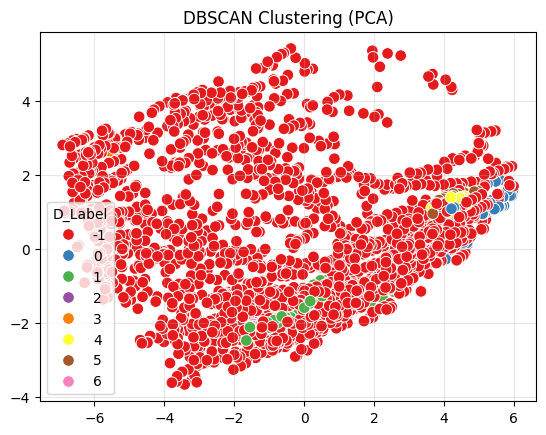

In [105]:
sns.scatterplot(
    x=pca_data[:,0],
    y=pca_data[:,1],
    hue=data['D_Label'],
    palette='Set1',
    s=70
)
plt.title("DBSCAN Clustering (PCA)")
plt.grid(alpha=0.3)
plt.show()

In [106]:
score=silhouette_score(scaled_df,data['D_Label'])
score

-0.2490710811262307

In [107]:
# Gausian Mixture

In [108]:
from sklearn.mixture import GaussianMixture

In [110]:
gmm= GaussianMixture(n_components=5,random_state=42)

In [111]:
gmm.fit(scaled_df)

GaussianMixture(n_components=5, random_state=42)

In [112]:
data['GMM_Label']=gmm.predict(scaled_df)

In [113]:
data['GMM_Label'].value_counts()

GMM_Label
2    772
4    644
3    533
0    484
1    271
Name: count, dtype: int64

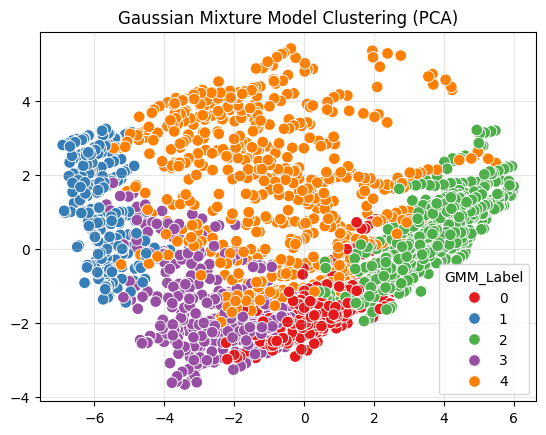

In [114]:
sns.scatterplot(
    x=pca_data[:, 0],
    y=pca_data[:, 1],
    hue=data['GMM_Label'],
    palette='Set1',
    s=70
)
plt.title("Gaussian Mixture Model Clustering (PCA)")
plt.grid(alpha=0.3)
plt.show()

In [115]:
#Silhouette Score

In [117]:
gmm_score=silhouette_score(scaled_df,data['GMM_Label'])

In [118]:
gmm_score

0.12308040534923177

In [119]:
### Model Evaluation

In [120]:
from sklearn.metrics import calinski_harabasz_score

In [121]:
results = {
    "KMeans": {
        "Silhouette": silhouette_score(scaled_df, data['K_Label']),
        "Calinski_Harabasz": calinski_harabasz_score(scaled_df, data['K_Label'])
    },
    "HAC": {
        "Silhouette": silhouette_score(scaled_df, data['HAC_Label']),
        "Calinski_Harabasz": calinski_harabasz_score(scaled_df, data['HAC_Label'])
    },
    "DBSCAN": {
        "Silhouette": silhouette_score(scaled_df, data['D_Label']),
        "Calinski_Harabasz": calinski_harabasz_score(scaled_df, data['D_Label'])
    },
    "GMM": {
        "Silhouette": silhouette_score(scaled_df, data['GMM_Label']),
        "Calinski_Harabasz": calinski_harabasz_score(scaled_df, data['GMM_Label'])
    }
}


In [122]:
results

{'KMeans': {'Silhouette': 0.25677007958366566,
  'Calinski_Harabasz': 1162.6048148039326},
 'HAC': {'Silhouette': 0.22305782021971496,
  'Calinski_Harabasz': 972.483950421408},
 'DBSCAN': {'Silhouette': -0.2490710811262307,
  'Calinski_Harabasz': 50.658118782290195},
 'GMM': {'Silhouette': 0.12308040534923177,
  'Calinski_Harabasz': 636.7116653788345}}

In [123]:
# K Means is selected as suitable clustering for this dataset

In [124]:
# Model Deployment

In [125]:
import joblib

In [127]:
joblib.dump(scaled_df,'scaler.pkl')


['scaler.pkl']

In [128]:
joblib.dump(hmodel,'kmeans_model.pkl')

['kmeans_model.pkl']